In [ ]:
import os
import librosa
import pandas as pd
import soundfile as sf
from tqdm.notebook import tqdm_notebook as tqdm

: 

In [2]:
full_dataset = pd.DataFrame(columns=['path', 'sentence'])

In [3]:
#path_ljspeech = 'data/LJSpeech'
path_tts_portuguese = 'data/prime'
#path_custom_dataset = 'data/custom_dataset'

## TTS Portuguese Corpus

In [4]:
df_dataset_tts_portuguese = pd.read_csv(f'{path_tts_portuguese}/texts.csv', header=None, sep='==')
df_dataset_tts_portuguese = df_dataset_tts_portuguese.rename(columns={0: 'path', 1: 'sentence'})
df_dataset_tts_portuguese

/tmp/ipykernel_78801/857569029.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_dataset_tts_portuguese = pd.read_csv(f'{path_tts_portuguese}/texts.csv', header=None, sep='==')


,path,sentence
0,wavs/01.wav,Título I – Dos princípios fundamentais
1,wavs/02.wav,"Artigo 1º. A República Federativa do Brasil, f..."
2,wavs/03.wav,Constitui-se em estado democrático de direito ...
3,wavs/04.wav,Inciso I. A soberania. Inciso II.
4,wavs/05.wav,A cidadania. Inciso 3. A dignidade da pessoa h...
...,...,...
7600,wavs/995.wav,Artigo 49. É da competência exclusiva do Congr...
7601,wavs/996.wav,Artigo alterado pela Emenda Constitucional nº ...
7602,wavs/997.wav,Inciso I
7603,wavs/998.wav,Inciso 2. Autorizar o Presidente da República ...


In [5]:
df_dataset_tts_portuguese['path'] = f'{path_tts_portuguese}/' + df_dataset_tts_portuguese["path"]
df_dataset_tts_portuguese

,path,sentence
0,data/prime/wavs/01.wav,Título I – Dos princípios fundamentais
1,data/prime/wavs/02.wav,"Artigo 1º. A República Federativa do Brasil, f..."
2,data/prime/wavs/03.wav,Constitui-se em estado democrático de direito ...
3,data/prime/wavs/04.wav,Inciso I. A soberania. Inciso II.
4,data/prime/wavs/05.wav,A cidadania. Inciso 3. A dignidade da pessoa h...
...,...,...
7600,data/prime/wavs/995.wav,Artigo 49. É da competência exclusiva do Congr...
7601,data/prime/wavs/996.wav,Artigo alterado pela Emenda Constitucional nº ...
7602,data/prime/wavs/997.wav,Inciso I
7603,data/prime/wavs/998.wav,Inciso 2. Autorizar o Presidente da República ...


In [6]:
full_dataset = pd.concat([full_dataset, df_dataset_tts_portuguese], ignore_index=True)
full_dataset

,path,sentence
0,data/prime/wavs/01.wav,Título I – Dos princípios fundamentais
1,data/prime/wavs/02.wav,"Artigo 1º. A República Federativa do Brasil, f..."
2,data/prime/wavs/03.wav,Constitui-se em estado democrático de direito ...
3,data/prime/wavs/04.wav,Inciso I. A soberania. Inciso II.
4,data/prime/wavs/05.wav,A cidadania. Inciso 3. A dignidade da pessoa h...
...,...,...
7600,data/prime/wavs/995.wav,Artigo 49. É da competência exclusiva do Congr...
7601,data/prime/wavs/996.wav,Artigo alterado pela Emenda Constitucional nº ...
7602,data/prime/wavs/997.wav,Inciso I
7603,data/prime/wavs/998.wav,Inciso 2. Autorizar o Presidente da República ...


## Remove problemas no dataset

Printa os caminhos que não existe o arquivo (se não printar nada, significa que está tudo ok) e marca para serem removidos do dataset

In [7]:
for idx, path in enumerate(full_dataset['path']):
    if not os.path.exists(path):
        print(idx, path)
        full_dataset.loc[idx, 'sentence'] = None

Remove sentenças em branco

In [8]:
full_dataset[full_dataset['sentence'] == ''].count()

path        0
sentence    0
dtype: int64

In [9]:
full_dataset[full_dataset['sentence'] == ''] = None
full_dataset = full_dataset.dropna(subset='sentence')
full_dataset

,path,sentence
0,data/prime/wavs/01.wav,Título I – Dos princípios fundamentais
1,data/prime/wavs/02.wav,"Artigo 1º. A República Federativa do Brasil, f..."
2,data/prime/wavs/03.wav,Constitui-se em estado democrático de direito ...
3,data/prime/wavs/04.wav,Inciso I. A soberania. Inciso II.
4,data/prime/wavs/05.wav,A cidadania. Inciso 3. A dignidade da pessoa h...
...,...,...
7600,data/prime/wavs/995.wav,Artigo 49. É da competência exclusiva do Congr...
7601,data/prime/wavs/996.wav,Artigo alterado pela Emenda Constitucional nº ...
7602,data/prime/wavs/997.wav,Inciso I
7603,data/prime/wavs/998.wav,Inciso 2. Autorizar o Presidente da República ...


## Salva dataset

Armazena em uma nova coluna o tempo de cada áudio

In [10]:
all_times = []
for path in tqdm(full_dataset['path']):
    all_times.append(librosa.get_duration(filename=path))
full_dataset['time'] = all_times

  0%|          | 0/7605 [00:00<?, ?it/s]

In [11]:
full_dataset

,path,sentence,time
0,data/prime/wavs/01.wav,Título I – Dos princípios fundamentais,3.217279
1,data/prime/wavs/02.wav,"Artigo 1º. A República Federativa do Brasil, f...",9.200816
2,data/prime/wavs/03.wav,Constitui-se em estado democrático de direito ...,5.602676
3,data/prime/wavs/04.wav,Inciso I. A soberania. Inciso II.,4.409977
4,data/prime/wavs/05.wav,A cidadania. Inciso 3. A dignidade da pessoa h...,5.652789
...,...,...,...
7600,data/prime/wavs/995.wav,Artigo 49. É da competência exclusiva do Congr...,5.111565
7601,data/prime/wavs/996.wav,Artigo alterado pela Emenda Constitucional nº ...,4.590385
7602,data/prime/wavs/997.wav,Inciso I,10.183039
7603,data/prime/wavs/998.wav,Inciso 2. Autorizar o Presidente da República ...,9.391247


In [12]:
full_dataset.to_csv('data/dataset_custom.tsv', sep='\t', index=False)

# Limpar dataset

In [13]:
pd_dataset_dict = pd.read_csv('data/dataset_custom.tsv', sep='\t')
pd_dataset_dict

,path,sentence,time
0,data/prime/wavs/01.wav,Título I – Dos princípios fundamentais,3.217279
1,data/prime/wavs/02.wav,"Artigo 1º. A República Federativa do Brasil, f...",9.200816
2,data/prime/wavs/03.wav,Constitui-se em estado democrático de direito ...,5.602676
3,data/prime/wavs/04.wav,Inciso I. A soberania. Inciso II.,4.409977
4,data/prime/wavs/05.wav,A cidadania. Inciso 3. A dignidade da pessoa h...,5.652789
...,...,...,...
7600,data/prime/wavs/995.wav,Artigo 49. É da competência exclusiva do Congr...,5.111565
7601,data/prime/wavs/996.wav,Artigo alterado pela Emenda Constitucional nº ...,4.590385
7602,data/prime/wavs/997.wav,Inciso I,10.183039
7603,data/prime/wavs/998.wav,Inciso 2. Autorizar o Presidente da República ...,9.391247


## Remover áudios muito grande
Por mais que exista o parâmetro "max_input_length" no treinamento do código do Wav2Vec2, é interessante limpar o que não for utilizado, até porque ao fazer o preprocessing ele ocupa espaço em disco.

In [14]:
pd_dataset_dict['time'].sort_values()

7474     1.292925
343      1.363084
7404     1.954422
496      2.124807
7421     2.154875
          ...    
4191    33.225170
7226    33.826531
3450    35.740862
7047    38.958141
7031    44.681088
Name: time, Length: 7605, dtype: float64

In [15]:
ranges_time = []
ranges_time.append(pd_dataset_dict['time'].between(0, 5, inclusive='left').sum())
ranges_time.append(pd_dataset_dict['time'].between(5, 10, inclusive='left').sum())
ranges_time.append(pd_dataset_dict['time'].between(10, 15, inclusive='left').sum())
ranges_time.append(pd_dataset_dict['time'].between(15, 20, inclusive='left').sum())
ranges_time.append(pd_dataset_dict['time'].between(20, 25, inclusive='left').sum())
ranges_time.append(pd_dataset_dict['time'].between(25, 30, inclusive='left').sum())
ranges_time.append((pd_dataset_dict['time'] >= 30).sum())

[Text(0, 0, '2651'),
 Text(0, 0, '4121'),
 Text(0, 0, '631'),
 Text(0, 0, '152'),
 Text(0, 0, '30'),
 Text(0, 0, '12'),
 Text(0, 0, '8')]

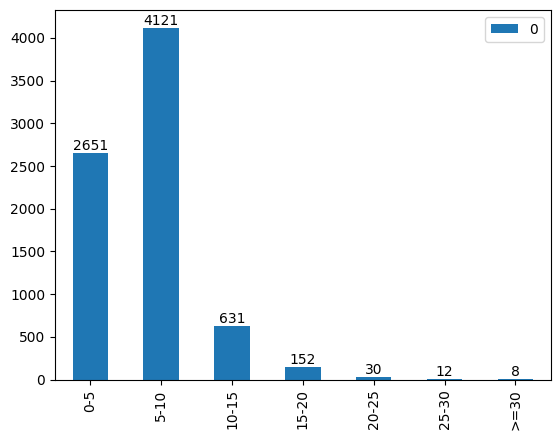

In [16]:
cat_time = pd.DataFrame(ranges_time, index=['0-5', '5-10', '10-15', '15-20', '20-25', '25-30', '>=30'])
ax = cat_time.plot.bar()
ax.bar_label(ax.containers[0])

In [17]:
# Programador Artificial dataset
#cat_time = pd.DataFrame(ranges_time, index=['0-5', '5-10', '10-15', '15-20', '20-25', '25-30', '>=30'])
#ax = cat_time.plot.bar()
#ax.bar_label(ax.containers[0])

Remover todos audios maior ou igual a 15 segundos

In [18]:
pd_dataset_dict.loc[pd_dataset_dict['time'] >= 15, 'sentence'] = None
pd_dataset_dict = pd_dataset_dict.dropna(subset='sentence')

In [19]:
pd_dataset_dict

,path,sentence,time
0,data/prime/wavs/01.wav,Título I – Dos princípios fundamentais,3.217279
1,data/prime/wavs/02.wav,"Artigo 1º. A República Federativa do Brasil, f...",9.200816
2,data/prime/wavs/03.wav,Constitui-se em estado democrático de direito ...,5.602676
3,data/prime/wavs/04.wav,Inciso I. A soberania. Inciso II.,4.409977
4,data/prime/wavs/05.wav,A cidadania. Inciso 3. A dignidade da pessoa h...,5.652789
...,...,...,...
7600,data/prime/wavs/995.wav,Artigo 49. É da competência exclusiva do Congr...,5.111565
7601,data/prime/wavs/996.wav,Artigo alterado pela Emenda Constitucional nº ...,4.590385
7602,data/prime/wavs/997.wav,Inciso I,10.183039
7603,data/prime/wavs/998.wav,Inciso 2. Autorizar o Presidente da República ...,9.391247


In [20]:
pd_dataset_dict.to_csv('data/dataset_cleaned.tsv', sep='\t', index=False)

# Seperar dataset para treinamento

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
pd_dataset = pd.read_csv('data/dataset_cleaned.tsv', sep='\t')
pd_dataset = pd_dataset.drop(columns=['time'])

In [23]:
train, valid = train_test_split(pd_dataset, test_size=0.2, shuffle=True)
#valid, test = train_test_split(valid, test_size=0.5, shuffle=True)

In [24]:
print(len(train))
print(len(valid))
#print(len(test))

5922
1481


In [25]:
train.to_csv('data/train.csv', sep='|', index=False, header=False)
valid.to_csv('data/valid.csv', sep='|', index=False, header=False)
#test.to_csv('data/test.tsv', sep='|', index=False)